# 11. 신경망 분류 모델

In [4]:
!wget -N https://github.com/DNRY/tfopt/raw/main/notebooks/ch11.py
!wget -N https://github.com/DNRY/tfopt/raw/main/notebooks/helper.py

--2022-10-08 10:37:25--  https://github.com/DNRY/tfopt/raw/main/notebooks/ch11.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DNRY/tfopt/main/notebooks/ch11.py [following]
--2022-10-08 10:37:25--  https://raw.githubusercontent.com/DNRY/tfopt/main/notebooks/ch11.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4447 (4.3K) [text/plain]
Saving to: ‘ch11.py’

ch11.py             100%[===================>]   4.34K  --.-KB/s    in 0s      

Last-modified header missing -- time-stamps turned off.
2022-10-08 10:37:25 (58.9 MB/s) - ‘ch11.py’ saved [4447/4447]

--2022-10-08 10:37:25--  https://githu

## 11.1 신경망 분류 모델의 필요성

W=[-0.03984674 -0.04534505], b=[0.01354096]


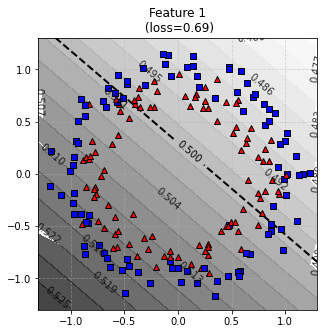

W=[-3.0084355 -3.2034914], b=[2.5585027]


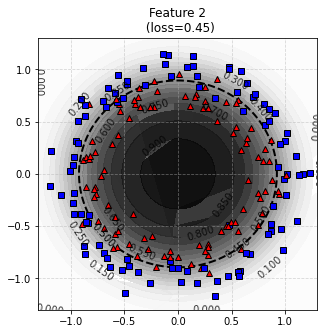

In [6]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
from sklearn.datasets import make_circles

xy, labels = make_circles(n_samples=200, noise=0.1, random_state=717)
labels = labels.reshape(-1,1)

f1 = lambda x,y: [x, y]
f2 = lambda x,y: [x**2, y**2]

class MyModel(tf.keras.Model):
  def __init__(self, dim=1, **kwargs):
      super().__init__(**kwargs)
      self.W = tf.Variable(tf.ones([dim,1]), dtype=tf.float32) 
      self.b = tf.Variable(tf.ones([1]), dtype=tf.float32) 

  def call(self, x): 
      return tf.nn.sigmoid(tf.matmul(x, self.W) + self.b)

from helper import generate_batches
from ch11 import *

for i, f_fn in enumerate([f1, f2], 1):
  features = np.array([f_fn(xval, yval) for xval, yval in xy])
  dim_features = features.shape[1]

  model = MyModel(dim_features)

  np.random.seed(7382)
  shuffled_id = np.arange(0, len(features))
  np.random.shuffle(shuffled_id)
  shuffled_features = features[shuffled_id]
  shuffled_labels = labels[shuffled_id]

  MaxEpochs = 15
  batch_size = 25
  lr = 0.1

  model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss = tf.keras.losses.BinaryCrossentropy())
  model.fit(shuffled_features, shuffled_labels, epochs = MaxEpochs, batch_size=batch_size, shuffle=False, verbose=0)
    
  prediction_values = model(features).numpy()
  loss = lambda y, yhat: tf.reduce_mean(-y * tf.math.log(yhat) - (1-y) * tf.math.log(1-yhat))
  final_loss = loss(labels, prediction_values)
  print('W={}, b={}'.format(model.W.numpy().flatten(), model.b.numpy()))

  plot_model(model, f_fn, xy, labels, 'Feature {}\n (loss={:1.2f})'.format(i, final_loss))